In [1]:
import numpy as np

# Fungsi untuk memprediksi berat
def predict_weight(width, height, a, b, class_adjustment):
    return (a * width) + (b * height) + class_adjustment

# Data yang akan diuji
width = 100
height = 200
actual_weight = 200  # berat sebenarnya untuk nasi

# Rentang koefisien yang akan diuji
a_values = np.arange(0.1, 1.1, 0.1)
b_values = np.arange(0.1, 1.1, 0.1)
class_adjustment = 50  # untuk nasi

# Menyimpan hasil kesalahan
results = []

# Uji berbagai kombinasi koefisien
for a in a_values:
    for b in b_values:
        predicted_weight = predict_weight(width, height, a, b, class_adjustment)
        error = abs(predicted_weight - actual_weight)  # Hitung kesalahan
        results.append((a, b, predicted_weight, error))

# Temukan kombinasi terbaik
best_result = min(results, key=lambda x: x[3])  # Min kesalahan
print("Koefisien terbaik: a = {}, b = {}, Prediksi berat = {}, Kesalahan = {}".format(best_result[0], best_result[1], best_result[2], best_result[3]))


Koefisien terbaik: a = 0.1, b = 0.7000000000000001, Prediksi berat = 200.0, Kesalahan = 0.0


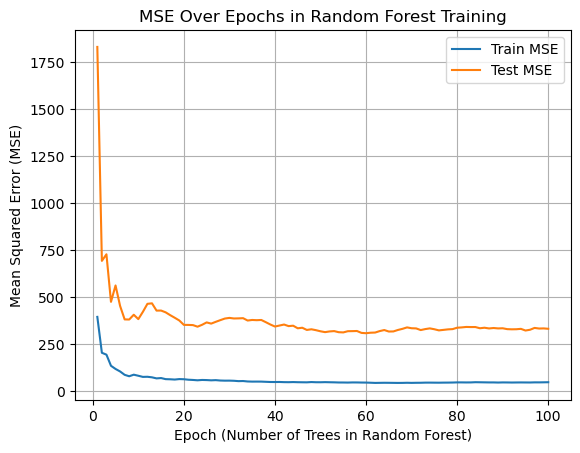

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Membuat dummy data untuk bounding box dan kelas makanan
data = {
    'width': np.random.randint(50, 300, 100),  # lebar bounding box
    'height': np.random.randint(50, 300, 100),  # tinggi bounding box
    'class_label': np.random.choice(['nasi', 'ayam_goreng', 'sayuran'], 100)  # label makanan
}

# Mengubah class_label menjadi one-hot encoding
df = pd.DataFrame(data)
df = pd.get_dummies(df, columns=['class_label'])

# Menambahkan kolom target (dummy weight), berat makanan tergantung pada lebar dan tinggi bounding box
df['weight'] = (0.5 * df['width']) + (0.3 * df['height']) + \
    np.where(df['class_label_nasi'] == 1, 50, 0) + \
    np.where(df['class_label_ayam_goreng'] == 1, 100, 0) + \
    np.where(df['class_label_sayuran'] == 1, 20, 0) + \
    np.random.normal(0, 10, 100)  # noise tambahan untuk membuat data lebih realistis

# Membagi data menjadi input (X) dan target (y)
X = df.drop(columns=['weight'])  # Input model: lebar, tinggi, dan one-hot encoded class labels
y = df['weight']  # Target model: berat makanan

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk simulasi training epoch-like menggunakan Random Forest
def train_random_forest_with_epochs(n_epochs):
    mse_train = []
    mse_test = []
    
    for epoch in range(1, n_epochs + 1):
        # Membuat Random Forest dengan jumlah pohon yang sesuai dengan epoch
        model_rf = RandomForestRegressor(n_estimators=epoch, random_state=42)
        
        # Melatih model
        model_rf.fit(X_train, y_train)
        
        # Prediksi di data train dan test
        train_pred = model_rf.predict(X_train)
        test_pred = model_rf.predict(X_test)
        
        # Menghitung Mean Squared Error (MSE) untuk train dan test
        mse_train.append(mean_squared_error(y_train, train_pred))
        mse_test.append(mean_squared_error(y_test, test_pred))
    
    return mse_train, mse_test

# Simulasi training dengan 100 "epochs" (n_estimators 1 sampai 100)
n_epochs = 100
mse_train, mse_test = train_random_forest_with_epochs(n_epochs)

# Visualisasi loss MSE over "epochs"
plt.plot(range(1, n_epochs + 1), mse_train, label='Train MSE')
plt.plot(range(1, n_epochs + 1), mse_test, label='Test MSE')
plt.xlabel('Epoch (Number of Trees in Random Forest)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Over Epochs in Random Forest Training')
plt.legend()
plt.grid(True)
plt.show()


# HyperTune

In [2]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
